In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score


## Load dataset

In [3]:
df=pd.read_csv('Mall_Customers.csv')

## Basic Exploration to get better understanding of the dataset

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


data check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

> droping uninformative column(CustomerID) and set it as index 

> No null value based on info


> check to see if any duplicate value exist

In [8]:
df.set_index("CustomerID", inplace=True)

In [9]:
df.columns = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [10]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
AnnualIncome,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
df.sort_values(by="AnnualIncome")[-10:]

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
191,Female,34,103,23
192,Female,32,103,69
193,Male,33,113,8
194,Female,38,113,91
195,Female,47,120,16
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18


In [16]:
x=df.groupby(['Gender'])['Gender'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio

Gender,Female,Male
Gender,0.56,0.44


it seems there is some outliers at AnnualIncome from #195

EDA

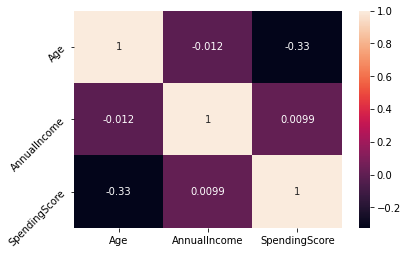

In [24]:
fig = plt.figure()
sns.heatmap(df.corr(), annot=df.corr())
plt.yticks(rotation=45)
plt.show()

there is not a highly correlated features, the most is between age and spendingscore(negative)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function f

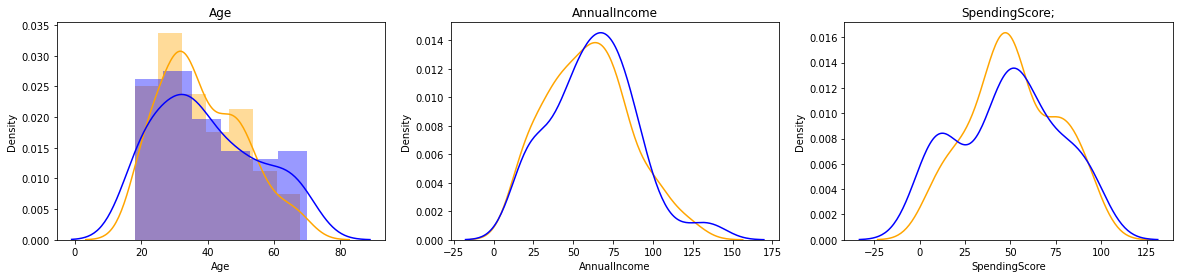

In [13]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df.Age[df['Gender']=='Female'], color='orange', hist=True, kde=True, label='Female')
sns.distplot(df.Age[df['Gender']=='Male'], color='blue', hist=True, kde=True, label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df.AnnualIncome[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.AnnualIncome[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('AnnualIncome')

plt.subplot(1,3,3)
sns.distplot(df.SpendingScore[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.SpendingScore[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('SpendingScore;')

plt.show()

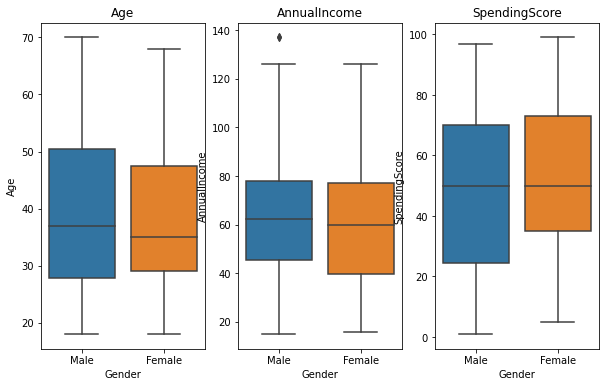

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df.AnnualIncome)
plt.title('AnnualIncome')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df.SpendingScore)
plt.title('SpendingScore')

plt.show()

The left plot indicates wider age range in male and also higher average age.
by exploring at center and right plots, show even though men have slightly higher income but in terms of spending women spent slighty more than men

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

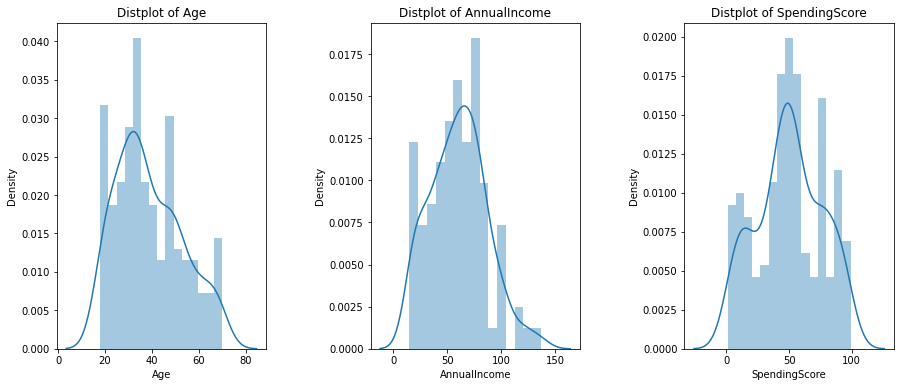

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

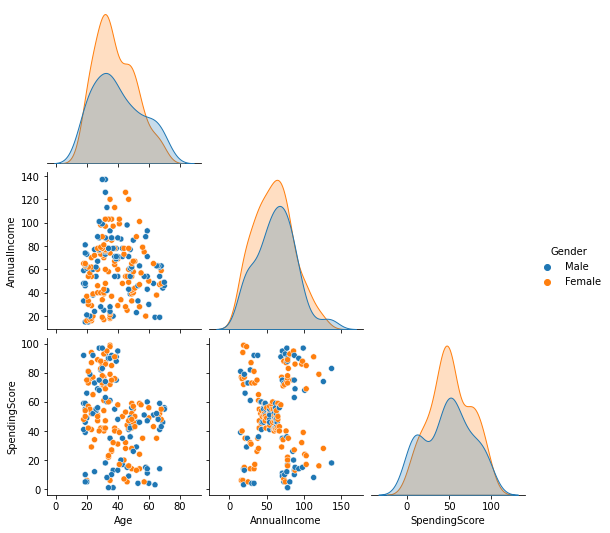

In [25]:
sns.pairplot(df, corner=True, vars = ['Age', 'AnnualIncome', 'SpendingScore'], hue = "Gender")

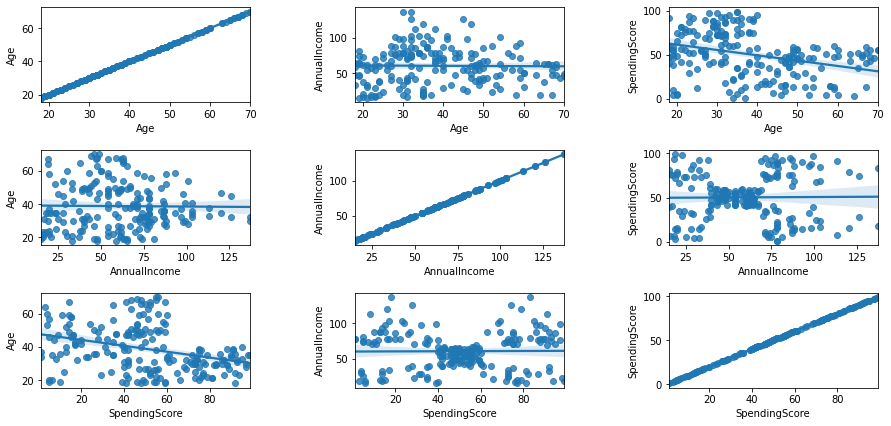

In [26]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    for y in ['Age' , 'AnnualIncome' , 'SpendingScore']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

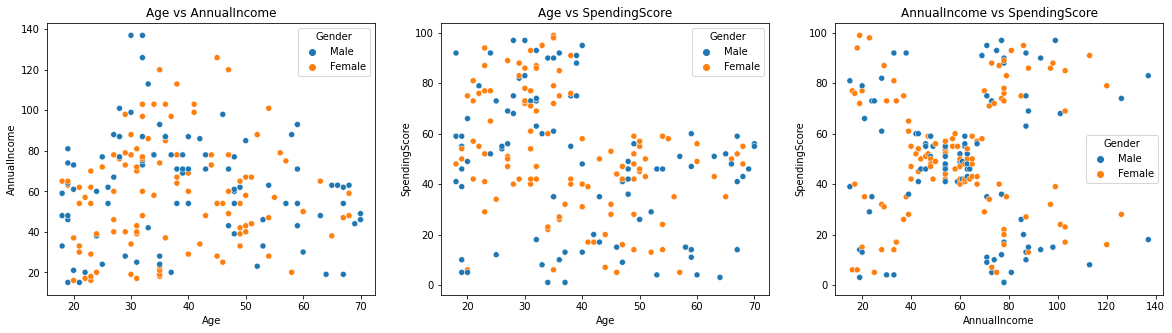

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age, y=df.AnnualIncome, hue=df.Gender)
plt.title('Age vs AnnualIncome')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age, y=df.SpendingScore, hue=df.Gender)
plt.title('Age vs SpendingScore')

plt.subplot(1,3,3)
sns.scatterplot(x=df.AnnualIncome, y=df.SpendingScore, hue=df.Gender)
plt.title('AnnualIncome vs SpendingScore')

plt.show()

Have you found something?
I did actually... you can see there seems to be 2 groups of customers by age vs score (top left quarter vs bottom right quarter), where diagonal is delimiting them.

What is more important is actually chart Income vs Score where we can see 5 different groups of customers (corners & center). What does it mean? We've probably found ideal way to cluster our customers based on income and score!

Also based on Annualincom vs SpendingScore, it is kind of a rabbit head, and indicates 5 groups


In [30]:

dff = df.drop('Gender', axis=1)

In [31]:
# scale, because clearly these are not on the same scale, and I want to ensure each variable has equal weight
sc = StandardScaler()
xs = sc.fit_transform(dff)
dff = pd.DataFrame(xs, index=dff.index, columns=dff.columns)

In [32]:
# Kmeans
KS = range(2, 10)

# storage
inertia = []
silo = []

for k in KS:
  km = KMeans(k)
  km.fit(dff)
  labs = km.predict(dff)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(dff, labs))
  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


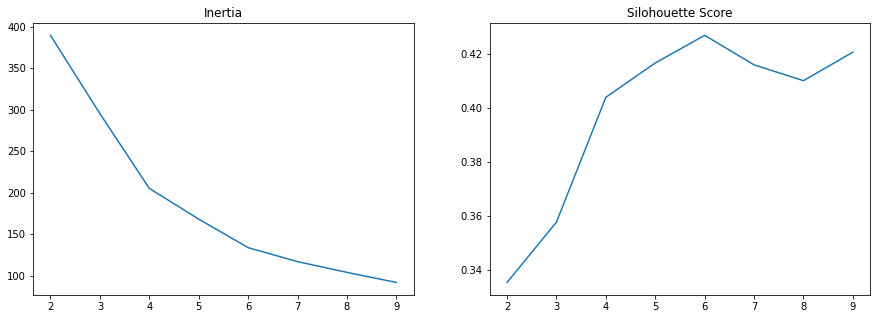

In [38]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KS, silo)

plt.show();

In [34]:
for i, s in enumerate(silo[:10]):
  print(i+2,s) # +2 to align num clusters with value

2 0.33547192894004574
3 0.357793388710272
4 0.4039582785148566
5 0.41664341513732767
6 0.4268547747113388
7 0.4159454056620821
8 0.4100960228678141
9 0.4206439140308163


In [37]:
# get the model
k6 = KMeans(6)
k6_labs = k6.fit_predict(dff)

# metrics
k6_silo = silhouette_score(dff, k6_labs)
k6_ssamps = silhouette_samples(dff, k6_labs)
np.unique(k6_labs)

array([0, 1, 2, 3, 4, 5], dtype=int32)